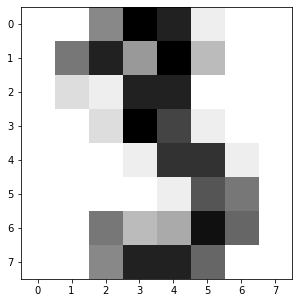

[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
  9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]
이 숫자는  3 입니다.


In [5]:
# MNIST 데이터 시각화 및 숫자 예측
from sklearn import datasets
import matplotlib.pyplot as plt

digit = datasets.load_digits()

plt.figure(figsize=(5,5))
plt.imshow(digit.images[3],cmap=plt.cm.gray_r,interpolation='nearest')

plt.show()
print(digit.data[3])
print('이 숫자는 ',digit.target[3],"입니다.")